+ This notebook is part of the addition lecture *An overview of key ideas* in the OCW MIT course 18.06 by Prof Gilbert Strang [1]
+ Created by me, Dr Juan H Klopper
    + Specialist Surgeon
    + Groote Schuur Hospital
    + Senior Lecturer in Surgery and Biostatistics & Machine Learning
    + University Cape Town
    + <a href="mailto:juan.klopper@uct.ac.za">Email me with your thoughts, comments, suggestions and corrections</a> 
<a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons Licence" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" href="http://purl.org/dc/dcmitype/InteractiveResource" property="dct:title" rel="dct:type">Linear Algebra OCW MIT18.06</span> <span xmlns:cc="http://creativecommons.org/ns#" property="cc:attributionName">IPython notebook [2] study notes by Dr Juan H Klopper</span> is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.

+ [1] <a href="http://ocw.mit.edu/courses/mathematics/18-06sc-linear-algebra-fall-2011/index.htm">OCW MIT 18.06</a>
+ [2] Fernando Pérez, Brian E. Granger, IPython: A System for Interactive Scientific Computing, Computing in Science and Engineering, vol. 9, no. 3, pp. 21-29, May/June 2007, doi:10.1109/MCSE.2007.53. URL: http://ipython.org

In [2]:
from IPython.core.display import HTML
css_file = 'style.css'
HTML(open(css_file, 'r').read())

![SegmentLocal](KRG_elegant_logo_for_light_BG.png "segment")
![SegmentLocal](UCT_logo.gif "segment")

# Introduction to matrices

## Preamble

Before we start our journey into linear algebra, we take a quick look at creating matrices using the `sympy` package.  As always, we start off by initializing LaTex printing using the `init_printing()` function.

In [2]:
from sympy import init_printing
init_printing()

## Representing matrices

Matrices are represented as $m$ rows of values, spread over $n$ columns, to make up an $m \times n$ array or grid.  The `sympy` package contains the `Matrix()` function to create these objects.

In [3]:
from sympy import Matrix

Expression (1) depicts a $4 \times 3$ matrix of integer values.  We can recreate this using the `Matrix()` function.  This is a matrix.  A matrix has a dimension, which lists, in order, the number of rows and the number of columns.  The matrix in (1) has dimension $3 \times 3$.

$$\begin{bmatrix} 1 && 2 && 3 \\ 4 && 5 && 6 \\ 7 && 8 && 9 \\ 10 && 11 && 12 \end{bmatrix} \tag{1}$$

The values are entered as a list of list, with each sublist containing a row of values.

In [4]:
matrix_1 = Matrix([[1, 2, 3],
                  [4, 5, 6],
                  [7, 8, 9],
                  [10, 11, 12]])
matrix_1

⎡1   2   3 ⎤
⎢          ⎥
⎢4   5   6 ⎥
⎢          ⎥
⎢7   8   9 ⎥
⎢          ⎥
⎣10  11  12⎦

By using the `type()` function we can inspect the object type of which `matrix_1` is an instance.

In [5]:
type(matrix_1)

sympy.matrices.dense.MutableDenseMatrix

We note that it is a `MutableDenseMatrix`.  Mutable refers to the fact that we can change the values in the matrix and dense refers to the fact that there are not an abundance of zeros in the data.

## Shape

The `.shape()` method calculates the number of rows and columns of a matrix.

In [11]:
matrix_1.shape

## Accessing values in rows and columns

The `.row()` and `.col()` methods give us access to the values in a matrix.  Remember that Python indexing starts at $0$, such that the first row (in the mathematical representation) is the zeroth row in `python`.

In [6]:
matrix_1.row(0)  # The first row

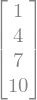

In [7]:
matrix_1.col(0)  # The first column

The `-1` value gives us access to the last row or column.

In [8]:
matrix_1.row(-1)

Every element in a matrix is indexed, with a row and column number.  In (2), we see a $3 \times 4$ matrix with the index of every element.  Note we place both values together, without a comma separating them.

$$\begin{pmatrix} a_{11} && a_{12} && a_{13} && a_{14} \\ a_{21} && a_{22} && a_{23} && a_{24} \\ a_{31} && a_{32} && a_{33} && a_{34} \end{pmatrix} \tag{2}$$

So, if we wish to find the element in the first row and the first column in our `matrix_1` variable (which holds a `sympy` matrix object), we will use `0,0` and not `1,1`.  The _indexing_ (using the _address_ of each element) is done by using square brackets.

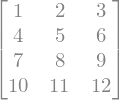

In [11]:
# Repriting matrix_1
matrix_1

In [9]:
matrix_1[0,0]

Let's look at the element in the second row and third column, which is $6$.

In [10]:
matrix_1[1,2]

We can also span a few rows and column.  Below, we index the first two rows.  This is done by using the colon, `:`, symbol.  The last number (after the colon is excluded, such that `0:2` refers to the zeroth and first row indices.

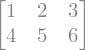

In [13]:
matrix_1[0:2,0:4]

We can also specify the actual rows or columns, by placing them in square brackets (creating a list).  Below, we also use the colon symbol on is won.  This denotes the selection of all values.  So, we have the first and third rows (mathematically) or the zeroth and second `python` row index, and all the columns.

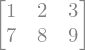

In [14]:
matrix_1[[0,2],:]

## Deleting and inserting rows

Row and column can be inserted into or deleted from a matrix using the `.row_insert()`, `.col_insert()`, `.row_del()`, and `.col_del()` methods.  

Let's have a look at where these inserted and deletions take place.

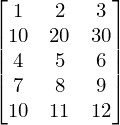

In [39]:
matrix_1.row_insert(1, Matrix([[10, 20, 30]]))  # Using row 1

We note that the row was inserted as row 1.

If we call the matrix again, we note that the changes were not permanent.

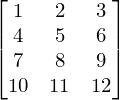

In [40]:
matrix_1

We have to overwrite the computer variable to make the changes permanent or alternatively create a new computer variable. (This is contrary to the current documentation.)

In [44]:
matrix_2 = matrix_1.row_insert(1, Matrix([[10, 20, 30]]))

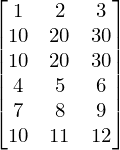

In [45]:
matrix_2

In [47]:
matrix_3 = matrix_1.row_del(1)  # Permanently deleting the second row
matrix_3  # A bug in the code currently returns a NoneType object

## Useful matrix constructors

There are a few special matrices that can be constructed using `sympy` functions.  The zero matrix of size $n \times n$ can be created with the `zeros()` function and the $n \times n$ identity matrix (more on this later) can be created with the `eye()` function.

In [16]:
from sympy import zeros, eye

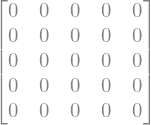

In [17]:
zeros(5)  # A 5x5 matrix of all zeros
zeros(5)

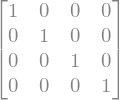

In [18]:
eye(4)  # A 4x4 identity matrix

The `diag()` function creates a diagonal matrix (which is square) with specified values along the main axis (top-left to bottom-right) and zeros everywhere else.

In [19]:
from sympy import diag

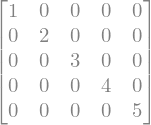

In [20]:
diag(1, 2, 3, 4, 5)